<a href="https://colab.research.google.com/github/dpostolovski/eeg_is/blob/master/IS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
  <img alt="FINKI **LOGO**" height="30px" src="https://www.finki.ukim.mk/Content/dataImages/downloads/logo-large-500x500_2.png" hspace="10px" vspace="0px">
  Интелигентни системи - Лабораториска вежба 2 (Претпроцесирање)
</h1>
<center><h3><i>Група 5<i><h3></center>

---



In [0]:
#@title Монтирање на Google Drive податочниот систем
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#@title Инсталирање и вчитување на потребните библиотеки

# Библиотека за истражување, визуелизација и анализирање на човечки 
# неврофизиолошки податоци (EEG, sEEG и др)
!pip install mne 
!pip install termcolor

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
from termcolor import colored
import mne
from sklearn.decomposition import PCA, FastICA

     |████████████████████████████████| 6.6MB 2.8MB/s 


## Вчитување на податоците
Податоците ги вчитуваме во променливата data. Вчитаните податоци се претставени со тридимензионална матрица со димензии 8 канали X 350 епохи X 1600 настани, но за потребите на mne библиотеката првите две димензии треба да ги замениме.

In [0]:
# Вчитување на податоците
data = loadmat('drive/My Drive/Интелигентни Системи/Data/SBJ01/S01-Train/trainData.mat')['trainData'] 

# Вчитување на label-ите
labels_arr = []
with open("drive/My Drive/Интелигентни Системи/Data/SBJ01/S01-Train/trainLabels.txt", "r") as file_labels:
    labels_arr = file_labels.read().splitlines()

# Вчитување на редоследот на светкање
events_arr = []
with open("drive/My Drive/Интелигентни Системи/Data/SBJ01/S01-Train/trainEvents.txt", "r") as file_events:
    events_arr = file_events.read().splitlines()

# Вчитување на редоследот на објекти кои се target
targets_arr = []
with open("drive/My Drive/Интелигентни Системи/Data/SBJ01/S01-Train/trainTargets.txt", "r") as file_targets:
    targets_arr = file_targets.read().splitlines()

# Прилагодување на податоците за користење со mne библиотеката
ch_names = ["C3", "Cz", "C4", "CPz", "P3", "Pz", "P4", "POz"]
ch_types = ['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg']
mne_info = mne.create_info(ch_names=ch_names, sfreq=250, ch_types=ch_types)
mne_array = np.swapaxes(data, 0, 1) # (епохa, канал, настан). 
raw_data = mne.epochs.EpochsArray(mne_array, mne_info)

if data.shape[0] == 8:
  print("Податоците се успешно вчитани.")
else:
  print("Настана грешка во вчитувањето на податоците.")

350 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Податоците се успешно вчитани.


## Визуелизација на податоците

Creating RawArray with float64 data, n_channels=65, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


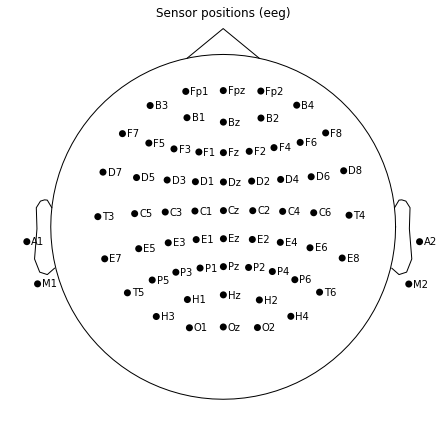

In [0]:
#@title Локација на сензорите
#@markdown Може да се забележи дека каналите кои ги отчитуваме се наоѓаат во средниот и задниот дел на мозокот.
montage = mne.channels.make_standard_montage("standard_alphabetic")
montage.plot();

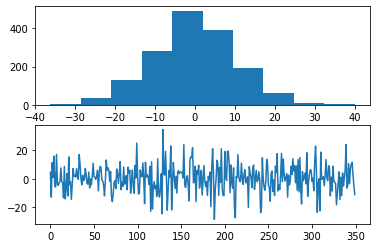

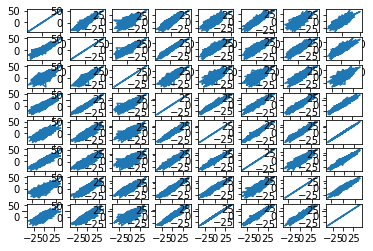

In [0]:
#@title Histogram и зависности помеѓу 8те канали
from scipy import io
import matplotlib.pyplot as plt
t = io.loadmat('drive/My Drive/Интелигентни Системи/Data/SBJ01/S01-Train/trainData.mat')['trainData'] 
t[0].shape

fig, axs = plt.subplots(2)
# plot histogram
axs[0].hist(t[0][3])
axs[1].plot(range(0,350), t[0][2][0:350])

k = 0
fig, axs = plt.subplots(8,8)
for i in range(8):
  for y in range(8):
    axs[i,y].plot(t[i][0], t[y][0])

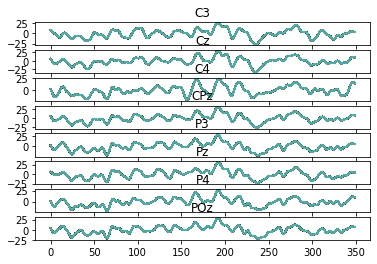

In [0]:
#@title Визуелизација на EEG сигналите во рамки на еден настан (првиот настан).
fig, axs = plt.subplots(8)
swapped_matrix = np.swapaxes(data, 1, 2) # (канал, настан, епоха).

for channel in range(0, 8):
  axs[channel].set_title(ch_names[channel])
  for epoch in range(0, 350):
    y_arr = data[channel][epoch][0]
    axs[channel].plot(range(0,350), swapped_matrix[channel][0])

Creating RawArray with float64 data, n_channels=8, n_times=1600
    Range : 0 ... 1599 =      0.000 ...     6.396 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=1600
    Range : 0 ... 1599 =      0.000 ...     6.396 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=1600
    Range : 0 ... 1599 =      0.000 ...     6.396 secs
Ready.


====== 1 ======
Прва епоха од сите 1600 настани


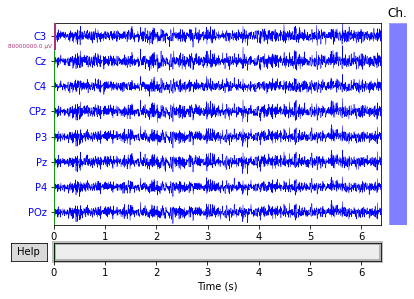

Средна епоха од сите 1600 настани


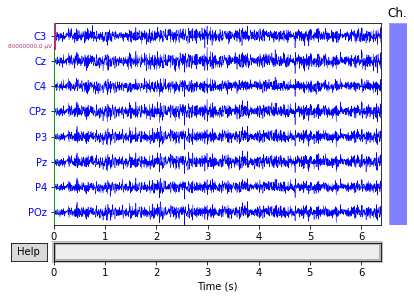

Последна епоха од сите 1600 настани


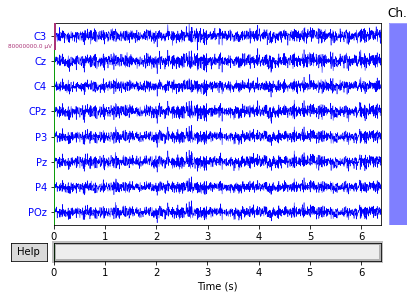



====== 2 ======
Effective window size : 6.400 (s)
350 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


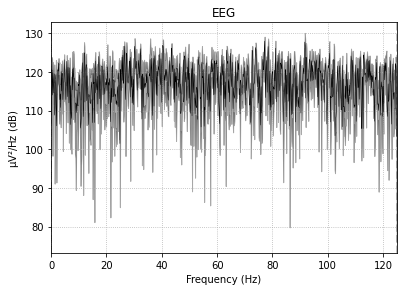

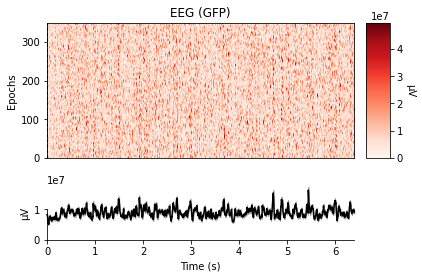

In [0]:
#@title Визуелизација на EEG сигналите во првата,средната и последната епоха.
#@markdown 1. Визуелизација на EEG податоците по канали за првата, средната и последната епоха.
#@markdown 2. Power Spectrum Density на 175-тата епоха. Во оваа епоха 
#@markdown сигналите би биле најстабилни за објектот кој светка.

middle_epoch = mne_array[175]
first_epoch = mne_array[0]
last_epoch = mne_array[349]
raw_middle = mne.io.RawArray(middle_epoch, mne_info)
raw_first = mne.io.RawArray(first_epoch, mne_info)
raw_last = mne.io.RawArray(last_epoch, mne_info)
for epoch in range(0, 350): # Секоја епоха
  i = 0
  for event in range(0, 1600): # Настан
    
    np.array([1, 2, 3])
    i = i+1



print("\n")
print(colored('====== 1 ======', 'red'))
print(colored("Прва епоха од сите 1600 настани", 'blue'))
raw_first.plot(n_channels=8, scalings=dict(eeg=40), title='EEG Signals',
         show=True, block=True, color = dict(eeg='blue'))
print(colored("Средна епоха од сите 1600 настани", 'blue'))
raw_middle.plot(n_channels=8, scalings=dict(eeg=40), title='EEG Signals',
         show=True, block=True, color = dict(eeg='blue'))
print(colored("Последна епоха од сите 1600 настани", 'blue'))
raw_last.plot(n_channels=8, scalings=dict(eeg=40), title='EEG Signals',
         show=True, block=True, color = dict(eeg='blue'))
print("\n")
print(colored('====== 2 ======', 'red'))
raw_middle.plot_psd(area_mode='range', show=False, average=True);
raw_data.plot_image();

Creating RawArray with float64 data, n_channels=8, n_times=200
    Range : 0 ... 199 =      0.000 ...     0.796 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=100
    Range : 0 ... 99 =      0.000 ...     0.396 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=200
    Range : 0 ... 199 =      0.000 ...     0.796 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=100
    Range : 0 ... 99 =      0.000 ...     0.396 secs
Ready.



====== ПРВ ОБЈЕКТ - Книги на полица ======
Вкупно светнал: 200
Вкупно светнал и бил target: 100


====== ПОСЛЕДЕН ОБЈЕКТ - Слика закачена на ѕид ======
Вкупно светнал: 200
Вкупно светнал и бил target: 100


====== Графици со EEG податоци кога светнале првиот и последниот објект  ======


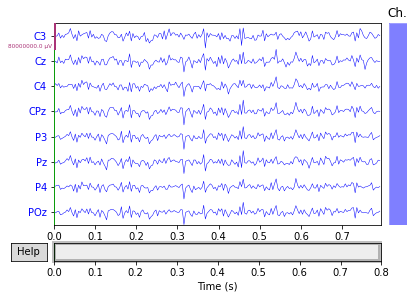

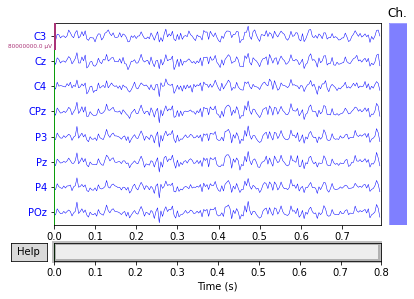



====== Графици со EEG податоци кога светнале првиот и последниот објект и биле target  ======


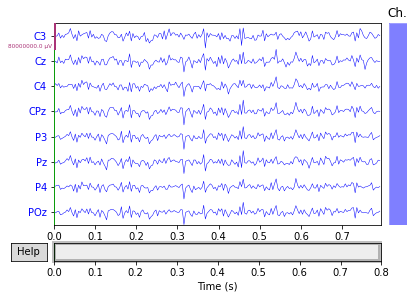

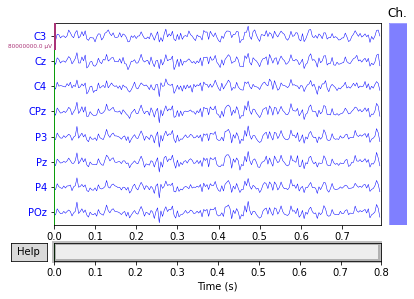

In [0]:
#@title Визуелна споредба на EEG податоците при светкање на првиот и последниот објект  
#@markdown Во првиот случај вршиме споредба на EEG податоците кога првиот и последниот 
#@markdown објект светнал без разлика дали бил target, додека во вториот случај ги споредуваме
#@markdown EEG податоците за случаи само кога тие објекти биле target објекти.

# Извлекување на настаните каде светнал првиот објект.
first_object_events = [index for index, value in enumerate(events_arr) if value == '1']
first_object_eeg_data = np.zeros((8,350, len(first_object_events)))
for channel in range(0, 8): # Секој канал
  for epoch in range(0, 350): # Секоја епоха
    i = 0
    for event in first_object_events: # Настан
      first_object_eeg_data[channel][epoch][i] = data[channel][epoch][event]
      i = i+1

# Креирање на соодветна дводимензионална низа за mne библиотеката
mne_first_obj_array = np.swapaxes(first_object_eeg_data, 0, 1) # (епохa, канал, настан).
epoch = mne_first_obj_array[175] 
first_object_raw = mne.io.RawArray(epoch, mne_info)





# Извлекување на настаните каде светнал првиот објект и бил target.
first_object_events_target = [index for index, value in enumerate(events_arr) if value == '1']
for event_pos in first_object_events_target:
  if targets_arr[event_pos] == 1:
    continue # Продолжи
  else:
    first_object_events_target.remove(event_pos) # Избриши -> Објектот не е target
first_object_target_eeg_data = np.zeros((8,350, len(first_object_events_target)))
for channel in range(0, 8): # Секој канал
  for epoch in range(0, 350): # Секоја епоха
    i = 0
    for event in first_object_events_target: # Настан
      first_object_target_eeg_data[channel][epoch][i] = data[channel][epoch][event]
      i = i+1

# Креирање на соодветна дводимензионална низа за mne библиотеката
mne_first_obj_target_array = np.swapaxes(first_object_target_eeg_data, 0, 1) # (епохa, канал, настан).
epoch = mne_first_obj_target_array[175] 
first_object_target_raw = mne.io.RawArray(epoch, mne_info)





# Извлекување на настаните каде светнал последниот објект.
last_object_events = [index for index, value in enumerate(events_arr) if value == '8']
last_object_eeg_data = np.zeros((8,350, len(last_object_events)))
for channel in range(0, 8): # Секој канал
  for epoch in range(0, 350): # Секоја епоха
    i = 0
    for event in last_object_events: # Настан
      last_object_eeg_data[channel][epoch][i] = data[channel][epoch][event]
      i = i+1

# Креирање на соодветна дводимензионална низа за mne библиотеката
mne_last_obj_array = np.swapaxes(last_object_eeg_data, 0, 1) # (епохa, канал, настан).
epoch = mne_last_obj_array[175] 
last_object_raw = mne.io.RawArray(epoch, mne_info)





# Извлекување на настаните каде светнал последниот објект и бил target.
last_object_events_target = [index for index, value in enumerate(events_arr) if value == '8']
for event_pos in last_object_events_target:
  if targets_arr[event_pos] == 1:
    continue # Продолжи
  else:
    last_object_events_target.remove(event_pos) # Избриши -> Објектот не е target
last_object_target_eeg_data = np.zeros((8,350, len(last_object_events_target)))
for channel in range(0, 8): # Секој канал
  for epoch in range(0, 350): # Секоја епоха
    i = 0
    for event in last_object_events_target: # Настан
      last_object_target_eeg_data[channel][epoch][i] = data[channel][epoch][event]
      i = i+1
      
# Креирање на соодветна дводимензионална низа за mne библиотеката
mne_last_obj_target_array = np.swapaxes(last_object_target_eeg_data, 0, 1) # (епохa, канал, настан).
epoch = mne_last_obj_target_array[175] 
last_object_target_raw = mne.io.RawArray(epoch, mne_info)





# Исцртување и печатење
print("\n\n")
print(colored('====== ПРВ ОБЈЕКТ - Книги на полица ======', 'red'))
print(colored("Вкупно светнал: " + str(len(first_object_events)), 'blue'))
print(colored("Вкупно светнал и бил target: " + str(len(first_object_events_target)), 'blue'))
print("\n")
print(colored('====== ПОСЛЕДЕН ОБЈЕКТ - Слика закачена на ѕид ======', 'red'))
print(colored("Вкупно светнал: " + str(len(last_object_events)), 'blue'))
print(colored("Вкупно светнал и бил target: " + str(len(last_object_events_target)), 'blue'))
print("\n")
print(colored('====== Графици со EEG податоци кога светнале првиот и последниот објект  ======', 'green'))
first_object_raw.plot(n_channels=8, scalings=dict(eeg=40), title='EEG Signals',
         show=True, block=True, color = dict(eeg='blue'));
last_object_raw.plot(n_channels=8, scalings=dict(eeg=40), title='EEG Signals',
         show=True, block=True, color = dict(eeg='blue'));
print("\n")
print(colored('====== Графици со EEG податоци кога светнале првиот и последниот објект и биле target  ======', 'green'))
first_object_raw.plot(n_channels=8, scalings=dict(eeg=40), title='EEG Signals',
         show=True, block=True, color = dict(eeg='blue'));
last_object_raw.plot(n_channels=8, scalings=dict(eeg=40), title='EEG Signals',
         show=True, block=True, color = dict(eeg='blue'));

Effective window size : 1.004 (s)


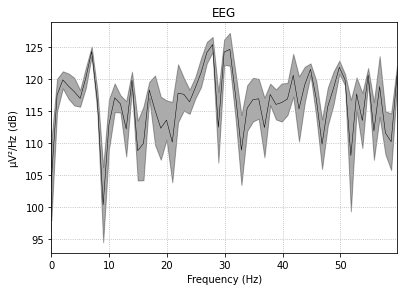

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 8 components
Fitting ICA took 0.1s.


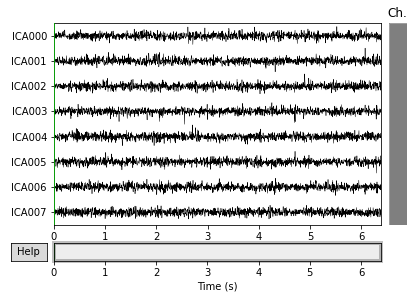

In [0]:
from mne.preprocessing import ICA
raw.plot_psd(tmin=0.2, tmax=1.2, fmin=0, fmax=60, average=True, spatial_colors=False);
num_components = 8
ica = ICA(n_components=num_components, method='fastica')
ica.fit(raw)
ica.plot_sources(raw);

## Претпроцесирање

In [0]:
#@title TO-DO
# TO-DO

In [0]:
#@title Стандардизација на податоците

standardizer = mne.decoding.Scaler(scalings='mean')
standardizer.fit(mne_array)
standardized_data = standardizer.transform(mne_array)
print("Просекот е:",-round(standardized_data.mean()))
print("Варијансата е:",round(standardized_data.var()))

Просекот е: 0.0
Варијансата е: 1.0


In [0]:
#@title Нормализација метод бр. 2


import numpy as np
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def min_max_scale(dataset: np.ndarray) -> np.ndarray:
    scaler = MinMaxScaler(feature_range=[0, 1])
    scaled_data = scaler.fit_transform(dataset)
    return scaled_data

def standard_scale(dataset: np.ndarray) -> np.ndarray:
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(dataset)
    return scaled_data

data = loadmat('drive/My Drive/Интелигентни Системи/Data/SBJ01/S01-Train/trainData.mat')['trainData'] 

v_min = data.min(axis=(0, 1), keepdims=True)
v_max = data.max(axis=(0, 1), keepdims=True)
print("Нормализирани податоци:")
(data - v_min)/(v_max - v_min)



350 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


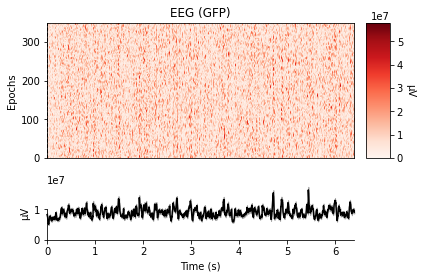

[<Figure size 432x288 with 3 Axes>]

In [0]:
#@title Отстранување на шум - претстава

Min, Max = round(mne_array.min()),round(mne_array.max())*1000000
picks = mne.pick_types(raw_data.info, meg=False, eeg=True, stim=False, eog=False)
mne.viz.plot_epochs_image(raw_data, picks='eeg', vmin= Min, vmax=Max)


Computing rank from data with rank='full'
    EEG: rank 8 from info
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 8 from info
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Transforming to Xdawn space
Zeroing out 6 Xdawn components
Inverse transforming to sensor space
350 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


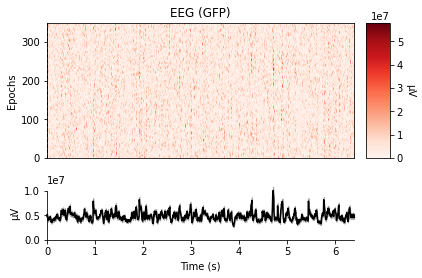

[<Figure size 432x288 with 3 Axes>]

In [0]:
#@title Отстранување на шум - реултати
xd = mne.preprocessing.Xdawn(n_components=2, signal_cov=None)
xd.fit(raw_data)
epochs_denoised = xd.apply(raw_data)
epochs_denoised.keys()
mne.viz.plot_epochs_image(epochs_denoised['1'], picks='eeg', vmin=Min, vmax=Max)

350 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 350 events and 276 original time points ...
25 bad epochs dropped
<Epochs  |   325 events (all good), -0.1 - 1 sec, baseline [None, 0], ~5.5 MB, data loaded,
 '1': 325>
Original sampling rate: 250.0 Hz
New sampling rate: 175.0 Hz


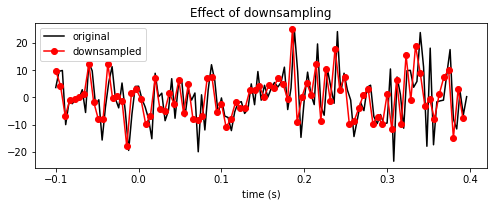

In [0]:
#@title Downsampling
events = raw_data.events
epochs = mne.Epochs(raw, events, tmin=-0.1, tmax=1, preload=True)
print(epochs)
# Downsample to 175 Hz
print('Original sampling rate:', epochs.info['sfreq'], 'Hz')
epochs_resampled = epochs.copy().resample(175, npad='auto')
print('New sampling rate:', epochs_resampled.info['sfreq'], 'Hz')

# Plot a piece of data to see the effects of downsampling
plt.figure(figsize=(7, 3))

n_samples_to_plot = int(0.5 * epochs.info['sfreq'])  # plot 0.5 seconds of data
plt.plot(epochs.times[:n_samples_to_plot],
         epochs.get_data()[ 0, 0, :n_samples_to_plot], color='black')

n_samples_to_plot = int(0.5 * epochs_resampled.info['sfreq'])
plt.plot(epochs_resampled.times[:n_samples_to_plot],
         epochs_resampled.get_data()[ 0, 0, :n_samples_to_plot],
         '-o', color='red')

plt.xlabel('time (s)')
plt.legend(['original', 'downsampled'], loc='best')
plt.title('Effect of downsampling')
mne.viz.tight_layout()

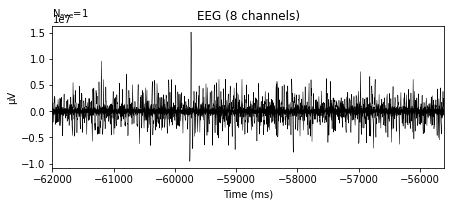

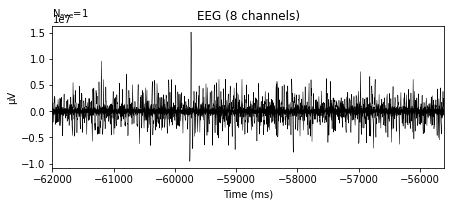

In [0]:
#@title Principal Component Analysis
pca = mne.decoding.UnsupervisedSpatialFilter(PCA(8), average=False)
pca_data = pca.fit_transform(mne_array)
ev = mne.EvokedArray(np.mean(pca_data, axis=0),
                     mne.create_info(8, raw_data.info['sfreq'],
                                     ch_types='eeg'), tmin=Min)
ev.plot(show=False, window_title="PCA", time_unit='ms')